# DBSCAN Algorithm from Scratch

In [2]:
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [9]:


class DBSCAN:
    def __init__(self, eps = 0.1, minPts = 3):
        self.eps = eps
        self.minPts = minPts
        self.clusterCount = 0


    def Distance(self, x, y):#To Calculate Distance between 2 points
        d = np.linalg.norm(x-y)# To caclulate l2 norm using Linear Algebra Library in numpy
        return d


    def RangeQuery(self, data, i):
        point_count = len(data)
        neighbours = np.array([], dtype=int)
        for j in np.arange(point_count):
            d = self.Distance(data[i], data[j])
            if d <= self.eps:
                neighbours = np.append(neighbours, [j])
        return neighbours


                    # ------------------------------------------------
                    # Cluster Labelling Rules:
                    # ------------------------------------------------
                    #  0 	=> Undefined / Unlabelled (Yet to Process)
                    # -1 	=> Noise
                    #  1	=> Cluster Number 1
                    #  2	=> Cluster Number 2
                    #  ...
                    #  N 	=> Cluster Number N
                    # ------------------------------------------------
                    
                    
                    
    def cluster(self, data):
        point_count = len(data)
        label = np.zeros((point_count), dtype=int)


        for i in np.arange(point_count):

            if label[i] != 0 :
                continue

            neighbours = self.RangeQuery(data, i)
            print('neighbours of ',i,'th data point are: ')
            print(neighbours)
            print('')
            
            if len(neighbours) < self.minPts:                   
                label[i] = -1
                print(neighbours, 'Labelled as Noise')
                continue

            self.clusterCount = self.clusterCount + 1
            label[i] = self.clusterCount

            seed_set = np.setdiff1d(neighbours, [i])
            for k in seed_set:
                if label[k] == -1:
                    label[k] = self.clusterCount
                if label[k] != 0:
                    continue

                label[k] = self.clusterCount
                other_neighbours = self.RangeQuery(data, k)
                if len(other_neighbours) >= self.minPts:
                    seed_set = np.append(seed_set, other_neighbours)
            print(seed_set)
        return label

In [10]:
cluster = pd.read_csv('Mall_Customers.csv')
cluster['Genre'] = cluster['Genre'].astype('category').cat.codes
cluster.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
data = cluster.values

neighbours of  0 th data point are: 
[ 0  1 14 15 17 20 21 23 27 51 61 65 68]

[  1  14  15  17  20  21  23  27  51  61  65  68   0   1  15  17  21  23
  25  27  33  41  51  61  65  68   0  14  18  20  27  30  32  42  55   0
   1  15  17  21  23  25  27  33  41  51  61  65  68  75   0   1  15  17
  20  21  23  25  27  33  41  51  61  65  68  75   0  14  17  18  20  21
  23  25  27  32  42  51  55  59  61  75  77  81  85   0   1  15  17  20
  21  23  25  27  33  41  51  61  65  68  75  81   0   1  15  17  20  21
  23  25  27  33  41  51  55  61  65  68  75  77  81   0   1  14  15  17
  18  20  21  23  25  27  33  41  42  51  53  55  59  61  65  68  75  77
  81  85  95   0   1  15  17  20  21  23  25  27  33  41  42  51  55  59
  61  65  68  75  77  81  85  91  92  95  98  99 103 104 113 120 129   0
   1  15  17  20  21  23  25  27  33  41  51  61  65  68  75  77  81  91
  95  99 103 113 120   0   1  15  17  21  23  25  27  33  41  51  61  65
  68  75  77  81  91  95  99 103 113 120   0 

[ 84  87  88  97 111 114 115 117 122 125 133 139 142 143 147 153 155 157
 159 161 163 165 167 175 181 183 189 191 193  87  88  97 111 115 117 119
 122 125 133 135 139 142 143 147 153 155 157 159 161 163 165 167 175 181
 183 189 191 193 195  78  84  87  88  93  94  96  97 100 101 105 111 112
 114 115 117 119 121 122 125 132 133 135 139 142 143 147 153 155 157 159
 161 163 165 167 175 180 181 183 184 189 191 193 195  88  93  94  96  97
 101 111 112 117 118 119 121 122 125 133 135 139 142 143 147 153 155 157
 159 161 163 165 167 175 180 181 183 184 189 191 193 195  88 111 115 122
 125 133 135 139 143 147 153 155 157 159 161 163 165 167 175 181 183 189
 191 193 195  84  87  88  97 111 112 114 115 117 119 121 122 125 132 133
 135 139 142 143 147 153 155 157 159 161 163 165 167 175 181 183 189 191
 193 195  84  87  88  94  97 100 105 111 112 114 115 117 119 121 122 125
 132 133 135 139 142 143 147 153 155 157 159 161 163 165 167 168 175 180
 181 183 184 189 191 193 195  88  97 111 114 115 12

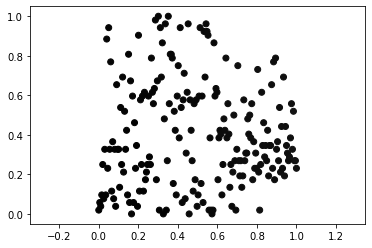

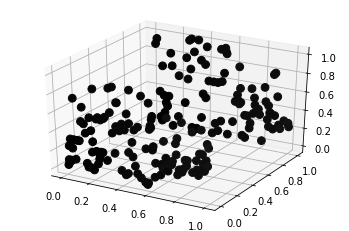

In [12]:
scaling = MinMaxScaler(feature_range=(0, 1)).fit(data)
data = scaling.transform(data)

dbs = DBSCAN(0.5, 5)
label = dbs.cluster(data)
data_labelled = np.zeros((200,6))
data_labelled[:,:-1] = data
data_labelled[:,-1] = label
print(data_labelled)
label = label + 1*(label == -1)
color = [str(item/255.) for item in label]
print(color)
plt.scatter(data[:,0], data[:,2], c=color)
plt.axis('equal')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2],s=60, depthshade=False, c=color)
plt.show()